## Bivariate -> Bi + Variate => Double Variable

In [1]:
import pandas as pd;
import seaborn as sns;

In [10]:
tips = sns.load_dataset('tips');#load the inbuild dataset from seaborn
titanic = pd.read_csv('train.csv');
flights = sns.load_dataset('flights');#load the inbuild dataset from seaborn
iris = sns.load_dataset('iris');#load the inbuild dataset from seaborn

In [11]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

#### Their are 3 types of Bivariate EDA

#### 1. Scatterplot (Numerical - Numerical)

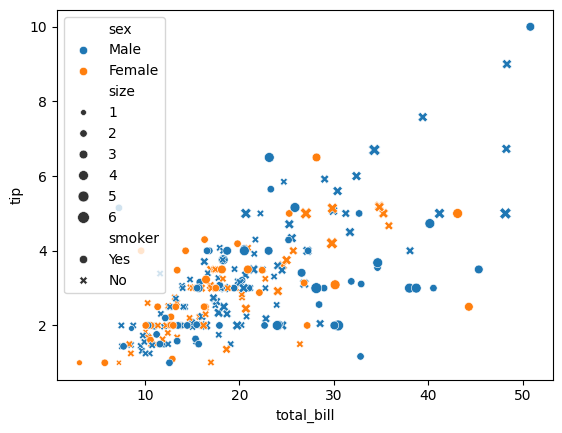

In [ ]:
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],hue=tips['sex'],style=tips['smoker'],size=tips['size']);
#this is how you can plot a scatterplot for bivariate analysis between two numerical columns with categorical columns as hue, style and size
#here hue is representing different colors
#style is representing different shapes
#size is representing different sizes of points

#### 2. Barplot (Numerical - Categorical)

In [16]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

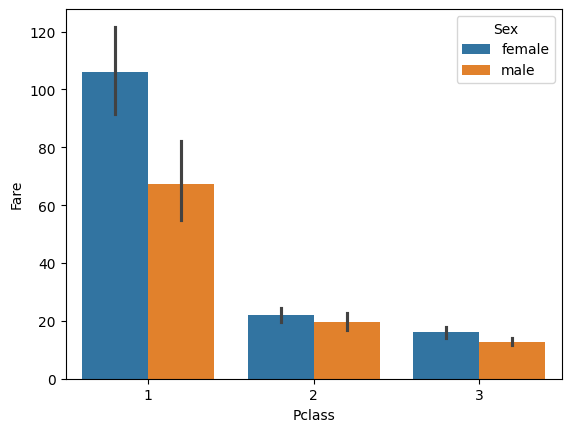

In [19]:
sns.barplot(x=titanic['Pclass'],y=titanic['Fare'],hue=titanic['Sex']);

#### 3. Box Plot (Numerical - Categorical)

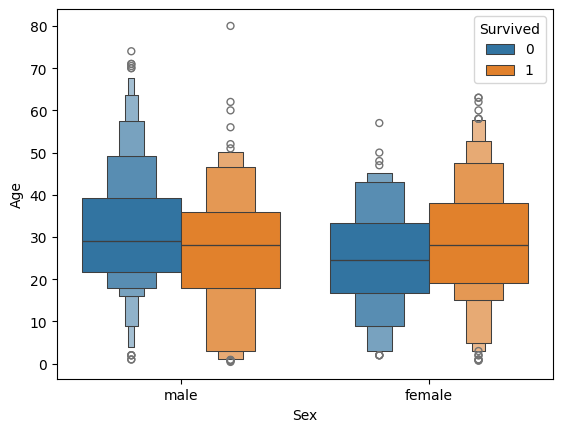

In [21]:
sns.boxenplot(x=titanic['Sex'],y=titanic['Age'],hue=titanic['Survived']);

#### 4. Distplot (Numerical - Categorical)

C:\Users\rajmu\AppData\Local\Temp\ipykernel_30656\32549988.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==0]['Age'],hist=False);
C:\Users\rajmu\AppData\Local\Temp\ipykernel_30656\32549988.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tita

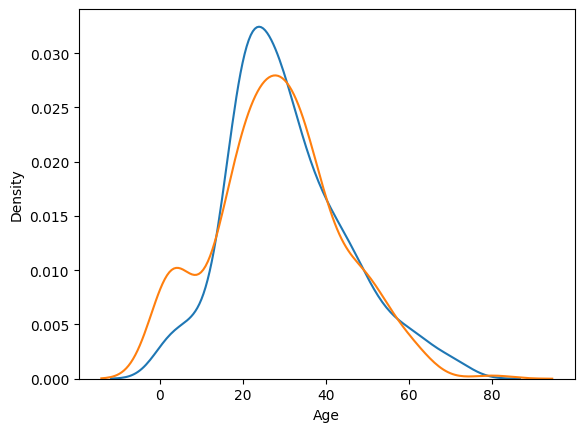

In [24]:
sns.distplot(titanic[titanic['Survived']==0]['Age'],hist=False);
sns.distplot(titanic[titanic['Survived']==1]['Age'],hist=False);

#### 5. HeatMap (Categorical - Categorical)

In [ ]:
print(pd.crosstab(titanic['Pclass'],titanic['Survived']));
#this is one way to create a grid table between two categorical columns
#but to visualize it better and if we have a larger dataset we can use heatmap

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


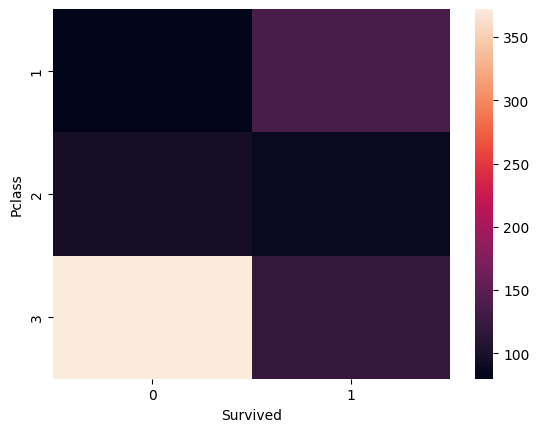

In [27]:
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']));

#### 6. ClusterMap (Categorical - Categorical)

In [37]:
# sns.clustermap(pd.crosstab(titanic['SibSp'], titanic['Survived']));

#### 7.Pairplot

In [38]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

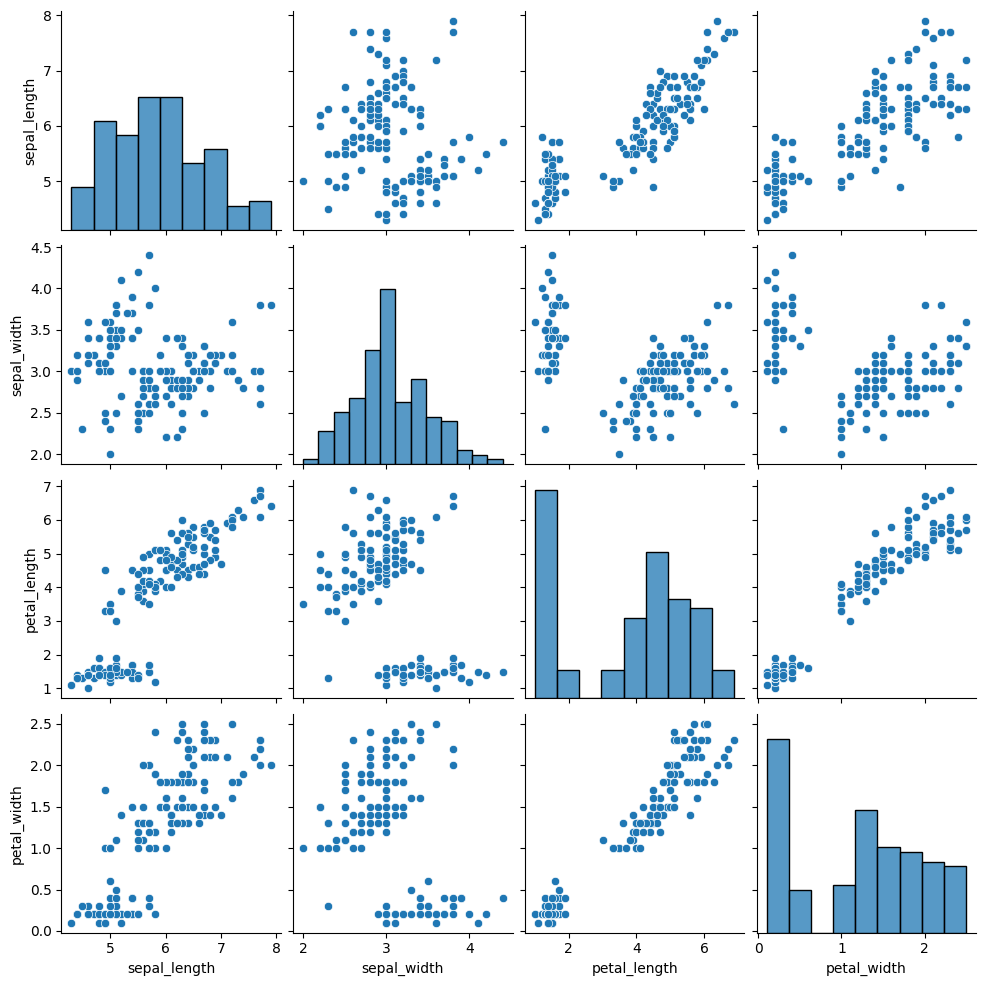

In [ ]:
sns.pairplot(iris);
#it create the scatterplots for all the numerical columns against each other and also the histogram for each numerical column on the diagonal

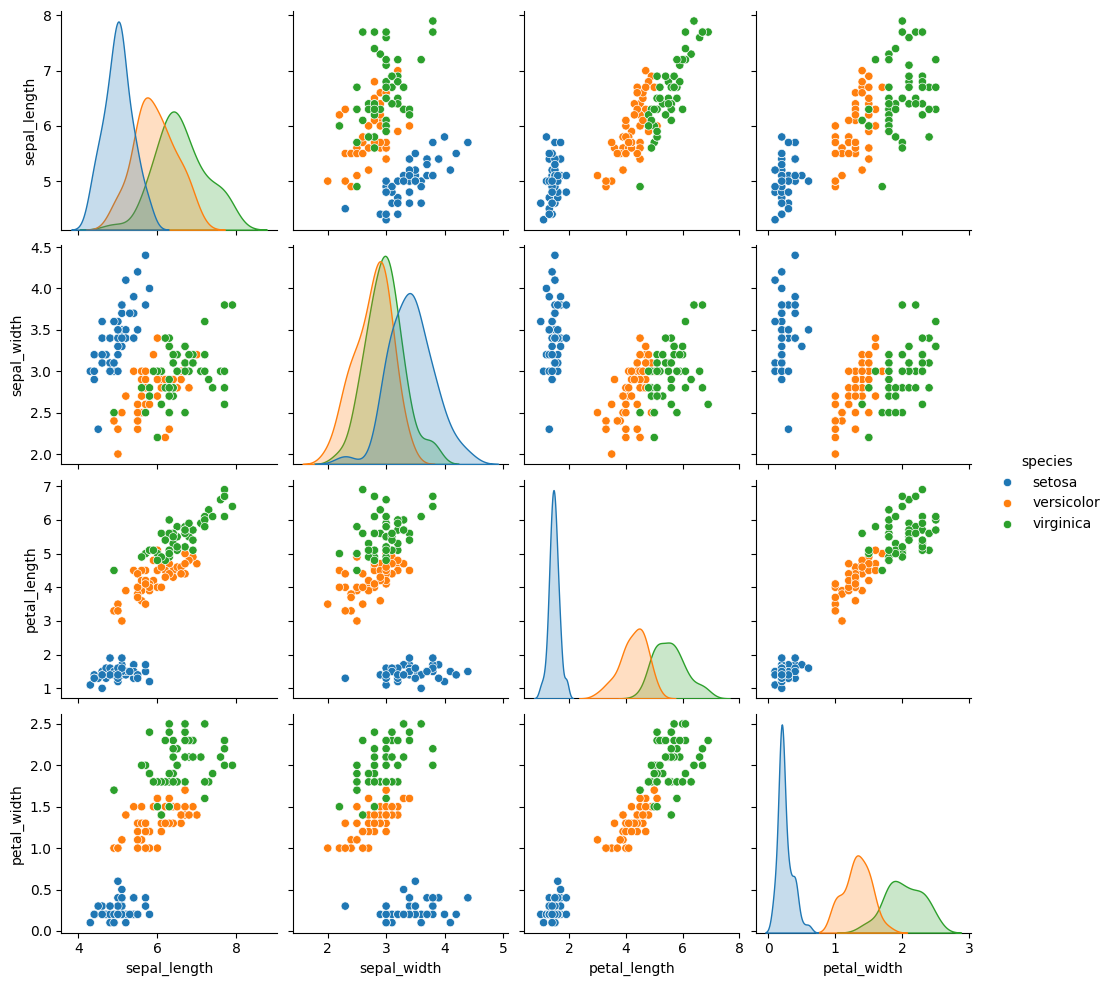

In [ ]:
sns.pairplot(iris,hue='species');
#it create the same scatterplots but with different colors for different species

#### 8. Lineplot (Numerical - Numerical)

In [44]:
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [51]:
# aggregate only the numeric 'passengers' column to avoid summing a categorical 'month' column
new = flights.groupby('year')['passengers'].sum().reset_index()

<Axes: xlabel='year', ylabel='passengers'>

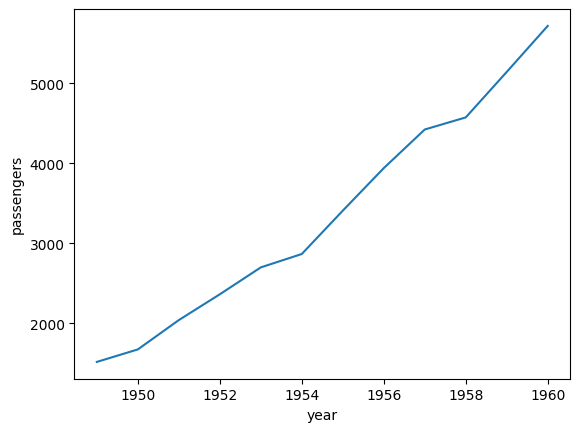

In [55]:
sns.lineplot(data=new, x='year', y='passengers')

In [57]:
flights.pivot_table(values='passengers',index='month',columns='year')

C:\Users\rajmu\AppData\Local\Temp\ipykernel_30656\2056291100.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights.pivot_table(values='passengers',index='month',columns='year')


year    1949   1950   1951   1952   1953   1954   1955   1956   1957   1958  \
month                                                                         
Jan    112.0  115.0  145.0  171.0  196.0  204.0  242.0  284.0  315.0  340.0   
Feb    118.0  126.0  150.0  180.0  196.0  188.0  233.0  277.0  301.0  318.0   
Mar    132.0  141.0  178.0  193.0  236.0  235.0  267.0  317.0  356.0  362.0   
Apr    129.0  135.0  163.0  181.0  235.0  227.0  269.0  313.0  348.0  348.0   
May    121.0  125.0  172.0  183.0  229.0  234.0  270.0  318.0  355.0  363.0   
Jun    135.0  149.0  178.0  218.0  243.0  264.0  315.0  374.0  422.0  435.0   
Jul    148.0  170.0  199.0  230.0  264.0  302.0  364.0  413.0  465.0  491.0   
Aug    148.0  170.0  199.0  242.0  272.0  293.0  347.0  405.0  467.0  505.0   
Sep    136.0  158.0  184.0  209.0  237.0  259.0  312.0  355.0  404.0  404.0   
Oct    119.0  133.0  162.0  191.0  211.0  229.0  274.0  306.0  347.0  359.0   
Nov    104.0  114.0  146.0  172.0  180.0  203.0  237.0  271.0  305.0  310.0   
Dec    118.0  140.0  166.0  194.0  201.0  229.0  278.0  306.0  336.0  337.0   

year    1959   1960  
month                
Jan    360.0  417.0  
Feb    342.0  391.0  
Mar    406.0  419.0  
Apr    396.0  461.0  
May    420.0  472.0  
Jun    472.0  535.0  
Jul    548.0  622.0  
Aug    559.0  606.0  
Sep    463.0  508.0  
Oct    407.0  461.0  
Nov    362.0  390.0  
Dec    405.0  432.0

C:\Users\rajmu\AppData\Local\Temp\ipykernel_30656\2230379170.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))


<Axes: xlabel='year', ylabel='month'>

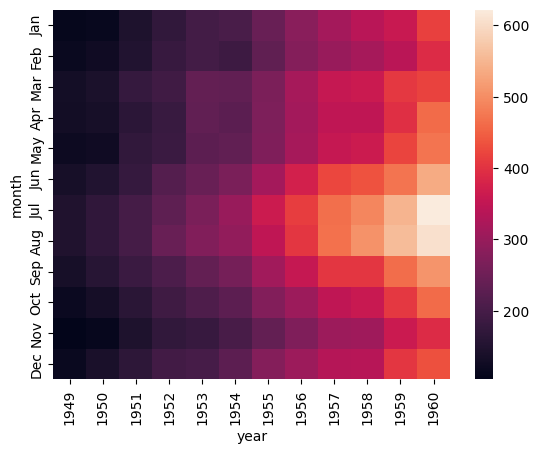

In [58]:
sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))